**Bold**
*Italics*
#Title
[url]
(line text)


# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
url =  "https://raw.githubusercontent.com/otubrempong/Hands-on-Machine-Learning-Training-With-Python/refs/heads/main/Datasets/housing.csv"
housing = pd.read_csv(url)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


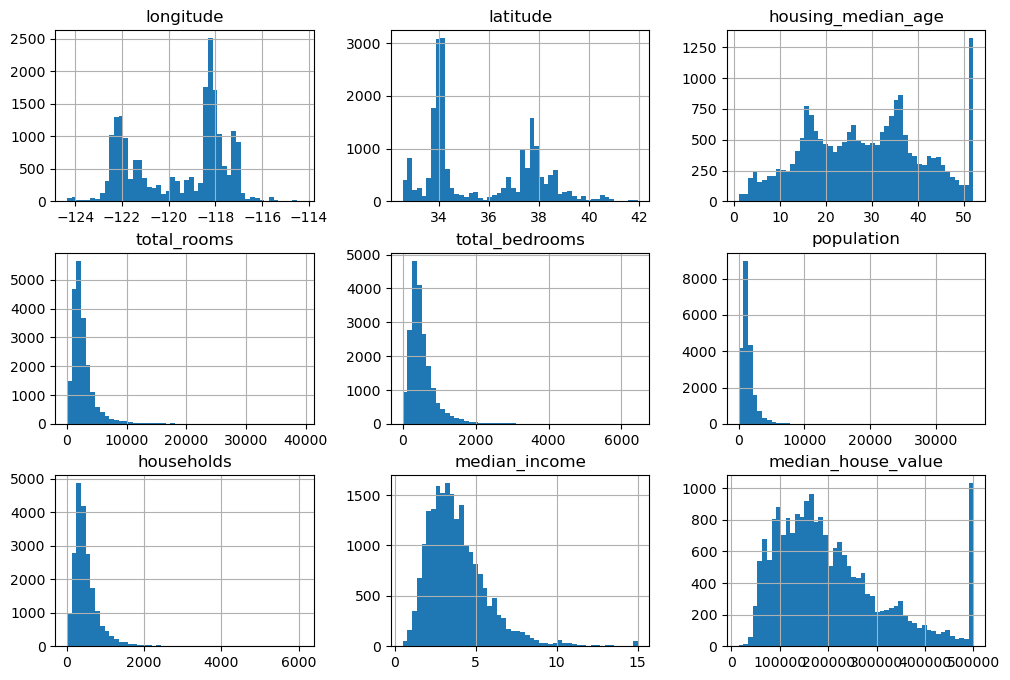

In [6]:
housing.hist(bins=50, figsize=(12,8))
plt.show()
             

# Creating a Test set

In [7]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [8]:
train_set, test_set = shuffle_and_split_data(housing, test_ratio=0.2)
print(f"length of train set is {len(train_set)} and length of test set is {len(test_set)}")

length of train set is 16512 and length of test set is 4128


#Splliting using scikit learn train_test_split()

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

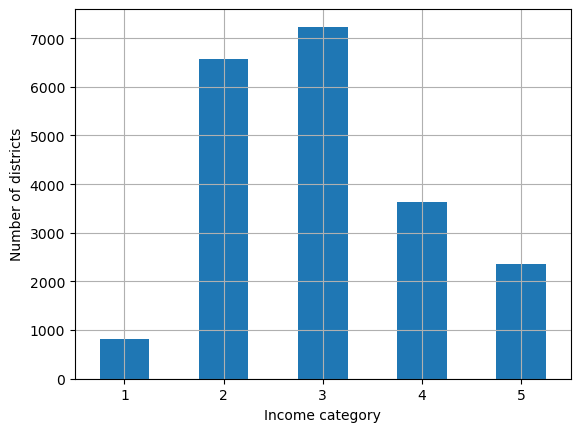

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,
grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

# Performing Stratified sampling based on income category

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2,
random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing,
     housing["income_cat"]):
    strat_train_set_n = housing.loc[train_index]
    strat_test_set_n = housing.loc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [12]:
strat_train_set, strat_test_set = strat_splits[0]

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

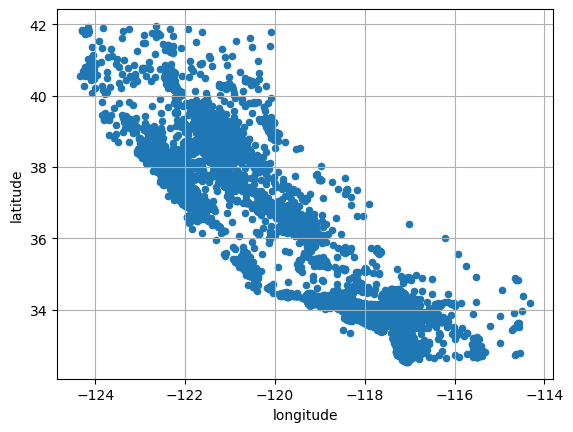

In [15]:
housing  = strat_train_set.copy()
#To visualize geographical information 
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

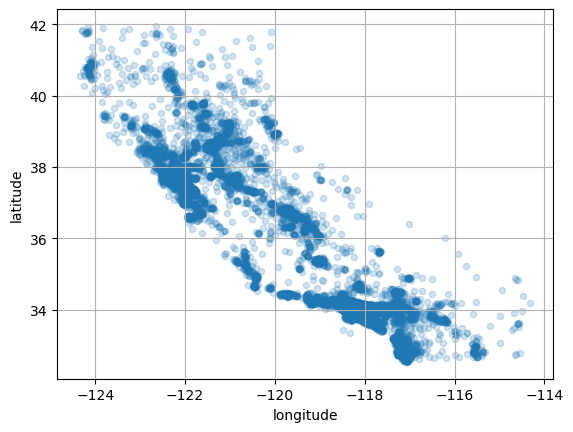

In [16]:
#To visualize the highly density areas
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.2, grid=True)
plt.show()

# Looking at the housing price visually 

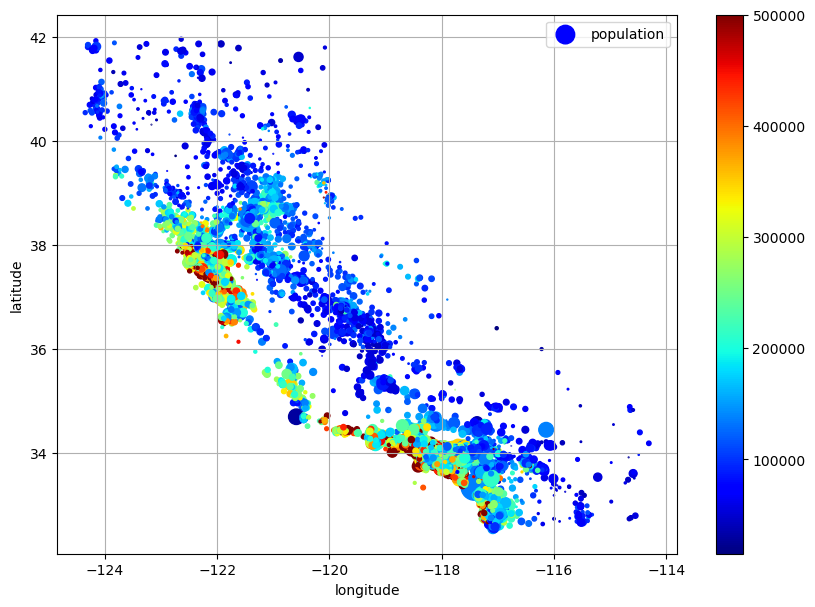

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c=housing["median_house_value"], cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10,7)
)
plt.show()
# The radius of each circle represents the district's population (option s)
# color represents the house prices 
# cmap is predefined color map, called jet which ranges from blue(low value) to red(high values)

# Looking for correlation 

In [18]:
corr_matrix = housing.loc[: , housing.columns!="ocean_proximity"].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [19]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Using pandas scatter matrix to plot the correlation on the most correlated features

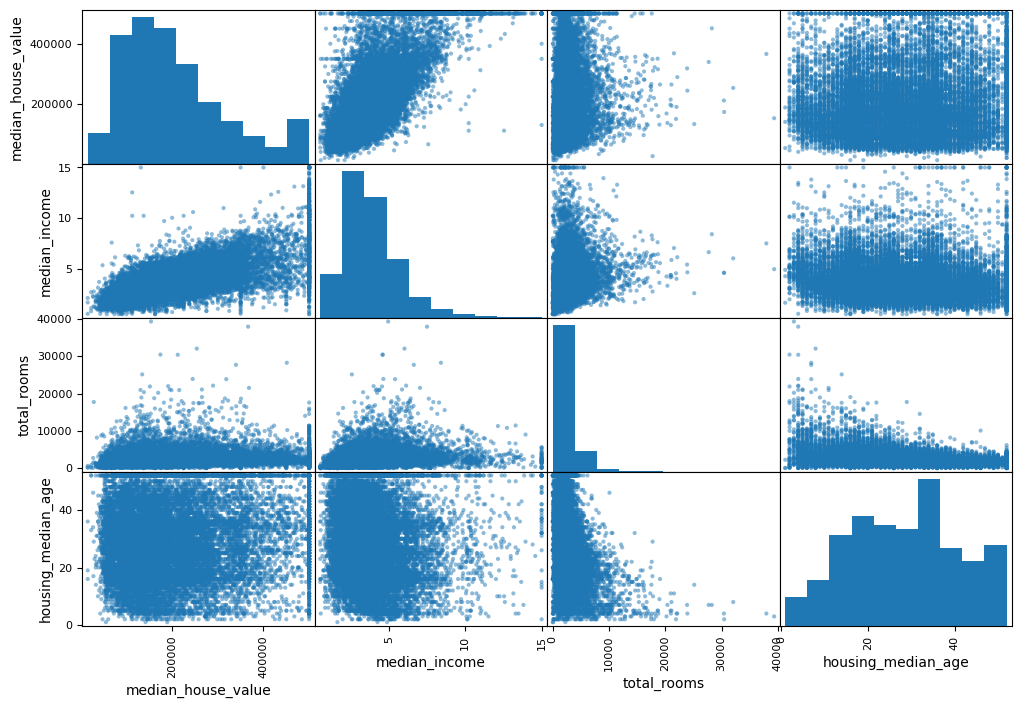

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

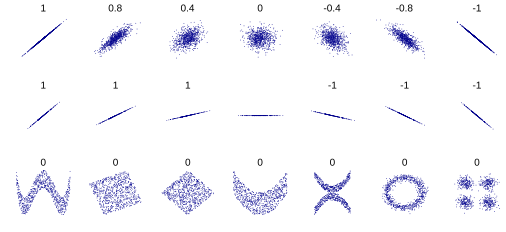

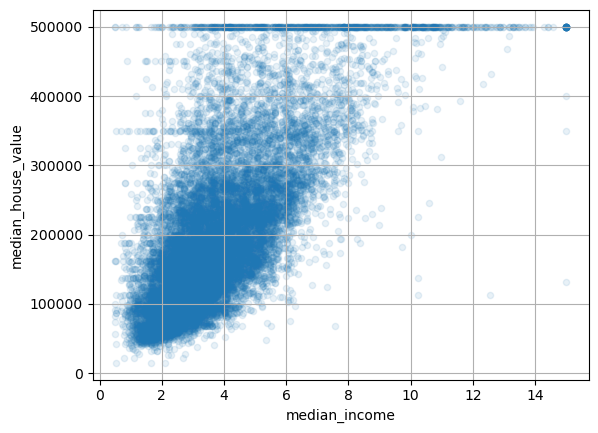

In [21]:
housing.plot(kind="scatter", x="median_income",
y="median_house_value",
alpha=0.1, grid=True)
plt.show()

# Creating new combinations of attributes

In [22]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [23]:
corr_matrix = housing.loc[: , housing.columns!="ocean_proximity"].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning

## Ways of solving missing values
  1. Get rid of the corresponding districts.
  2. Get rid of the whole attributes
  3. Set the missing values to some value (zero, the mean, the median, etc.).
This is called imputation

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
housing_num = housing.select_dtypes(include=[np.number])

In [27]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
X = imputer.transform(housing_num)

In [31]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [32]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(5)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


## Most machine learning algorithms prefer to work with numbers so we need to convert the categorical attributes to numbers

In [33]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [34]:
housing_cat_encoded[:8]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [35]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [37]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [39]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [41]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

# Feature Scaling and Transformation

### Common methods
1. Min-Max scaling
2. Standard Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [43]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

### Transforming the traget 

In [44]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels =target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()

model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [45]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())

model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

## Custom Transformers

In [46]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [47]:
'''
Your transformation function can take hyperparameters as additional
arguments. For example, here’s how to create a transformer that computes the
same Gaussian RBF similarity measure as earlier:
'''
from sklearn.metrics.pairwise import rbf_kernel

rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]],gamma=0.1))

age_simil_35 =rbf_transformer.transform(housing[["housing_median_age"]])


### Building a transformer that is trainable

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
      def __init__(self, with_mean=True): # no *args or **kwargs!
          self.with_mean = with_mean
      def fit(self, X, y=None): # y is required even though we don't use it
          X = check_array(X) # checks that X is an array with finite float values
          self.mean_ = X.mean(axis=0)
          self.scale_ = X.std(axis=0)
          self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
          return self # always return self!
      def transform(self, X):
          check_is_fitted(self) # looks for learned attributes (with trailing _)
          X = check_array(X)
          assert self.n_features_in_ == X.shape[1]
          if self.with_mean:
             X = X - self.mean_
          return X / self.scale_

#### A custom transformer can (and often does) use other estimators in its
implementation. For example, below we see a custom transformer that uses a
KMeans clusterer in the fit() method to identify the main clusters in the
training data, and then uses rbf_kernel() in the transform() method to
measure how similar each sample is to each cluster center:

In [49]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
     def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
         self.n_clusters = n_clusters
         self.gamma = gamma
         self.random_state = random_state
     def fit(self, X, y=None, sample_weight=None):
         self.kmeans_ = KMeans(self.n_clusters,
         random_state=self.random_state)
         self.kmeans_.fit(X, sample_weight=sample_weight)
         return self # always return self!
     def transform(self, X):
         return rbf_kernel(X, self.kmeans_.cluster_centers_,
           gamma=self.gamma)
     def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in
         range(self.n_clusters)]

In [50]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.,random_state=42)

similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)

In [51]:
similarities[:3].round(2)

array([[0.31, 0.  , 0.  , 0.9 , 0.  , 0.01, 0.  , 0.17, 0.  , 0.  ],
       [0.  , 0.12, 0.94, 0.  , 0.  , 0.  , 0.  , 0.  , 0.42, 0.  ],
       [0.  , 0.1 , 0.  , 0.  , 0.43, 0.  , 0.11, 0.  , 0.02, 0.1 ]])

## Transformation Pipeline

In [52]:
import sklearn

In [53]:
sklearn.set_config(display="diagram")

In [54]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

#### using makepipeline

In [55]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [56]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [57]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
  index=housing_num.index)

In [58]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age",
"total_rooms", "total_bedrooms", "population", "households", "median_income"]

cat_attribs = ["ocean_proximity"]



In [59]:
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                            OneHotEncoder(handle_unknown="ignore")
                            )

In [60]:
preprocessing = ColumnTransformer([
       ("num", num_pipeline, num_attribs),
       ("cat", cat_pipeline, cat_attribs),
])

### another way

In [61]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer(
         (num_pipeline, make_column_selector(dtype_include=np.number)),
         (cat_pipeline, make_column_selector(dtype_include='object')),
)

In [62]:
housing_prepared = preprocessing.fit_transform(housing)

## creating a single pipeline that will performe all the transformation

In [63]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_pipeline(name=None):
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=lambda input_features: [name]),
        StandardScaler()
    )
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log),
    StandardScaler()
)
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                    StandardScaler()
                                    )

preprocessing = ColumnTransformer([
    ("bedrooms_ratio", ratio_pipeline("bedrooms_ratio"), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline("rooms_per_house"), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline("people_per_house"), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms","population", "households","median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include='object')),
],
                                  remainder=default_num_pipeline
                                 )

In [65]:
housing_prepared = preprocessing.fit_transform(housing)

In [66]:
housing_prepared.shape

(16512, 24)

In [ ]:
preprocessing.get_feature_names_out()